# Generate Random Modal Coefficients for a Simple Heat Equation Problem
______________________________________________________________________________

## Problem Description:
$u_t= \sigma u_{xx}$ in $(0, \pi)$ x $[0, \infty)$

$u(0,t) = u(\pi, t) = 0$

$u(x,0) = f(x)$

## Analytical Solution:
Choosing the basis of sines, 


$u(x,t) = \sum_{n=1}^{\infty} B_n sin(nx) e^{-n^2t}$

where $B_n$ values are chosen from a uniform distribution over $[0,1]$. To generate a variety of initial data and consequently a variety of trajectories, a number of coefficient vectors are generated and then evolved over time according to their corresponding $e^{-n^2t}$ terms. 

## Implementation

### Import Dependencies

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Variable Definitions

In [22]:
sigma = 0.1 # per the problem statement
n_coeff = 3 # number of modal coefficients to generate per vector
n_vec = 10 # number of unique trajectories or initial coeff. vectors
t0 = 0 # start time
t_end = 3 # end time
dt = 0.01 # time increment [sec]
steps = int((t_end - t0)/dt) + 1 # number of time steps (include t0 step)
x_num = 100 # number of spatial points between 0 and Pi

### Array Initialization

In [23]:
'''
coeffs: 3D matrix holding modal coefficients. Each 'fold', the first
dimension, corresponds to a unique trajectory or initial data. Within each
fold, each row holds the modal coefficients at a unique time step.
'''
coeffs = np.zeros((n_vec, steps, n_coeff)) 
t_vec = [t0 + k*dt for k in range(steps)] # vector of time values
x_vec = np.linspace(0,math.pi, x_num) # vector of spatial positions
sine_matrix = np.zeros((n_coeff, x_num)) # matrix of sin(nx) terms
u_matrix = np.zeros((n_vec, steps, x_num)) # initialize matrix holding u(x,t)

### Generate Modal Coefficients for Each Fold and Each Time Step

In [24]:
for f in range(n_vec): # for each unique trajectory
    # first generate the unique initial data
    coeffs[f,0,:] = np.random.uniform(0,1,n_coeff)
    
    # evolve the coefficients via their exponential terms
    for t in range(1,steps): # for each time step
        for n in range(1, n_coeff+1): # for each coefficient
            coeffs[f,t,n-1] = coeffs[f,0,n-1] * math.exp(-n**2 * sigma * t_vec[t])

### Check: Plot Each Coefficient in Trajectory 0 as a Function of Time

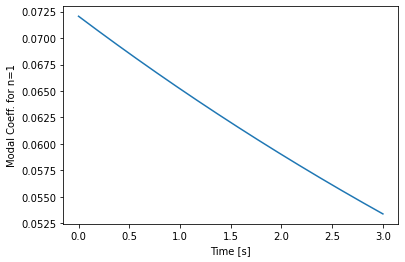

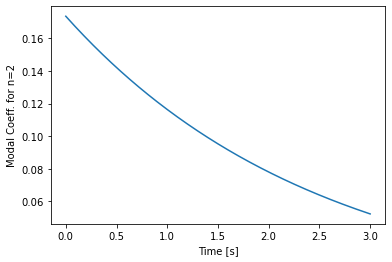

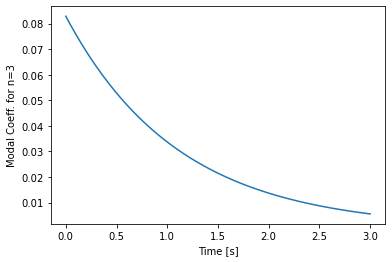

In [25]:
for n in range(1, n_coeff+1):
    plt.plot(t_vec, coeffs[0,:,n-1])
    plt.xlabel('Time [s]')
    plt.ylabel('Modal Coeff. for n=' + str(n))
    plt.show()

In [26]:
print('min coeff value: ', np.amin(coeffs))

min coeff value:  0.005568226820294134


### Generate Intermediate Sine Terms: sin(nx)

In [27]:
for x in range(x_num):
    for n in range(1,n_coeff+1):
        sine_matrix[n-1,x] = math.sin(n*x_vec[x])

### Compute u(x,t) for Each Trajectory

In [28]:
for f in range(n_vec): # for each trajectory
    for t in range(steps): # for each time step
        for x in range(x_num): # for each position
            u_matrix[f,t,x] = np.dot(sine_matrix[:,x], coeffs[f,t,:])

### Check: Plot u(x,t) for Trajectory 0 over all x 

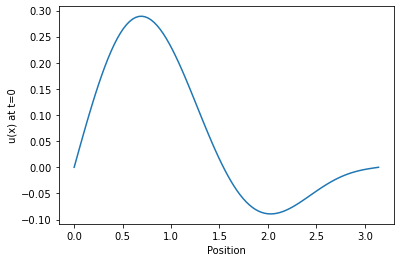

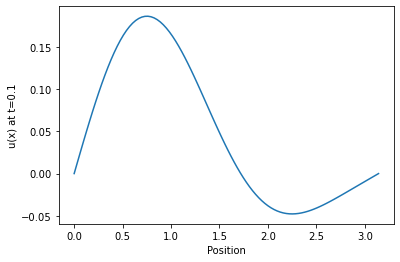

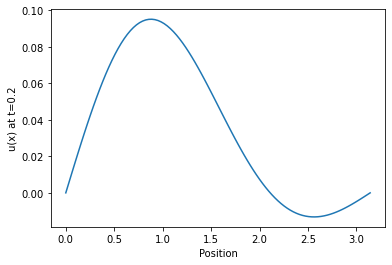

In [29]:
# initial conditions
plt.plot(x_vec, u_matrix[0,0,:])
plt.xlabel('Position')
plt.ylabel('u(x) at t=0')
plt.show()

# t = 0.1 sec
plt.plot(x_vec, u_matrix[0,100,:])
plt.xlabel('Position')
plt.ylabel('u(x) at t=0.1')
plt.show()

# t = 0.2 sec
plt.plot(x_vec, u_matrix[0,-1,:])
plt.xlabel('Position')
plt.ylabel('u(x) at t=0.2')
plt.show()

### Reshape and Save Modal Coefficient Matrix

In [30]:
print('Initial coefficient matrix shape: ', coeffs.shape)
print('Check: coeffs for first 10 seconds of Trajectory 3:\n', 
      coeffs[2,0:10,:])
coeffs = np.reshape(coeffs, (n_vec*steps, n_coeff))
print('Final coefficient matrix shape: ', coeffs.shape)
print('Check: coeffs for first 10 seconds of Trajectory 3:\n', 
      coeffs[(2*steps):(2*steps+10),:])
np.save('coeffs.npy', coeffs)

Initial coefficient matrix shape:  (10, 301, 3)
Check: coeffs for first 10 seconds of Trajectory 3:
 [[0.3509515  0.32718139 0.87368265]
 [0.35060073 0.32587528 0.86585479]
 [0.3502503  0.32457438 0.85809705]
 [0.34990023 0.32327868 0.85040883]
 [0.3495505  0.32198815 0.84278949]
 [0.34920112 0.32070277 0.83523841]
 [0.3488521  0.31942252 0.82775499]
 [0.34850342 0.31814738 0.82033862]
 [0.34815509 0.31687733 0.8129887 ]
 [0.34780711 0.31561235 0.80570463]]
Final coefficient matrix shape:  (3010, 3)
Check: coeffs for first 10 seconds of Trajectory 3:
 [[0.3509515  0.32718139 0.87368265]
 [0.35060073 0.32587528 0.86585479]
 [0.3502503  0.32457438 0.85809705]
 [0.34990023 0.32327868 0.85040883]
 [0.3495505  0.32198815 0.84278949]
 [0.34920112 0.32070277 0.83523841]
 [0.3488521  0.31942252 0.82775499]
 [0.34850342 0.31814738 0.82033862]
 [0.34815509 0.31687733 0.8129887 ]
 [0.34780711 0.31561235 0.80570463]]
